<h1><center>WhatsApp Chat Text Analysis using R</center></h1>

<h3><center>By Luis A. Andrade P.</center></h3>


This notebook consists of a series of R language codes executed over an exported WhatsApp exported file in text format (.txt). The codes are largely based on the excellent work [Text Analysis using WhatsApp data](https://cran.r-project.org/web/packages/rwhatsapp/vignettes/Text_Analysis_using_WhatsApp_data.html), also available on [Github](https://github.com/JBGruber/rwhatsapp), developed by [J. B. Gruber](https://github.com/JBGruber), who also based his job on the published [Text Mining with R](https://www.tidytextmining.com/) published by Julia Silge and David Robinson. This work was inspired by my schoolmates in the chat group that we have, because of their large contribution, curiosity and feedback with the analysis.

This notebook was written and executed in a Jupyter Notebook. Before starting this task we have to make sure that the notebook kernel is set to R and not Python, as it is normally set by default.  

Each WhatsApp chat window gives us the option "*Export Chat*" or its equivalent on each customized language, from where we get a .txt file with rows ordered chronologically each including date, time, user and message content. It is recommended not to include multimedia files whenever we export a chat because they are not needed for this job. The exported file, or files, can be saved at the repository of your choice. What is important is to correctly write the complete route of the file in this notebook.

The chat file I worked with in this notebook consists of a group chat that has been altered to protect the user's identities and places. **Most of the codes need to be adjusted to fit each chat file particularities**. Thereby it is very important for the analyst to be careful about what he or she is executing.  

We will work with several R libraries:
* ***rwhatsapp*** will allow us to transform the original WhatsApp text file into a data frame or table separated in columns with different attributes such as author, time, text, file source, ID, emoji and emoji name.  
* ***dyplr*** allows us to manipulate any table or data frame and its columns or attributes.
* ***lubridate*** is a useful library to manipulate and extract information about dates and times of the observations (messages in this case).
* ***ggplot*** is a key plotting module in R that provides very good quality plots
* ***tidytext*** is one of the libraries used for the messages text mining and word counting.
* ***stopwords*** is a useful tool to identify and there remove linking words such as articles and prepositions that important for essay writing but not for natural language processing.
* ***tm*** is another text mining tool to process the messages texts and feed the word clouds.
* ***wordcloud*** will allow us to plot the most common words from the preprocessed input in cloud shape.
* ***wordclud2*** is a more sophisticated and artistic option to plot the most repeated words as wordclouds.

Before starting to import the libraries and execute the codes, make sure that you have installed the required libraries.

The following two cells include the necessary commands to install each package or library. I left them as comments (with # on the left side). Should you need to install one or more packages, simply uncomment (remove the left #) the corresponding command line and run the cell or cells.

In [ ]:
#install.packages("rwhatsapp")
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("lubridate")

In [ ]:
#install.packages("tidytext")
#install.packages("stopwords")
#install.packages("tm")
#install.packages("wordcloud")
#install.packages("wordcloud2")

### Import the necessary libraries to execute the analytic tasks in this notebook

If any of the libraries doesn't load correctly, make sure that it is installed first. If it is not installed, uncomment the corresponding installation command in the previous cells. If there is any incompatibility error, it may be necessary to look for another solution regarding R and library versions. Many of the used modules were built under R 3.6.3. By the time I wrote this notebook, I was working in Jupyter with the R version 3.6.1 kernel.

In [1]:
#WhatsApp chat file conversion to dataframe and manipulation
library("rwhatsapp")
library("dplyr")
#Date and time manipulation
library("lubridate")
#Plotting libraries
library("ggplot2"); theme_set(theme_minimal())

#Word processing
library("tidytext")
library("stopwords")
library("tm")
#library("SnowballC")
#Word cloud
library("wordcloud")
library("wordcloud2")

Warning message:
"package 'rwhatsapp' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'tidytext' was built under R version 3.6.3"Warning message:
"package 'stopwords' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"
Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'tm'

The following object is masked from 'package:stopwor

### Importing and modifying the Whatsapp chat file

By using the command `rwa_read()` with import the chat file to be analyzed. **It is important to correctly type the file route, including its extension, .txt in this case**. 
 
It is also very important to indicate the right date format of the importing chat file, because it may vary with different regional configuration of the device from where the chat was exported. In my example, the dates came registered as **16/04/2019, 12:28 p. m.**. Therefore, the right format to specify for this example is `format = "dd/MM/yy, hh:mm a"`. There may be a lot of possible date formats. Here there is a [list of date formats](https://www.zoho.com/sites/default/files/crm/allowed-formats-for-fields-in-create-bulk-write-job-api.pdf) from where you can compare your particular chat date layout and the equivalent format.     
Another important step to do when importing a chat file is to remove the input data without any author, that are normally included as introductory messages by the application. Optionally, we can apply some filters such as those related to time. I.e. when we want to considered a limited range of dates.  

In a chat file, the contact names (*author* in the loaded data frame) appear as they registered in our devices. The unregistered users appear with their corresponding telephone numbers. For the purpose of a graphical analysis, it is advisable not to show the number but an alias, shorter and more confidential. Also, if the registered name is very long, it is a good idea to rename it to a shorter alias. We can do this in this notebook or script file by renaming the desire *author*(s) with the help of the commands `mutate` and `recode`. The left argument contains the original user name or number, between "", and the right argument contains the new alias we want to apply, also between "". Please note that the telphone numbers I put in the following cell are not real. You will need to **adapt the code with the numbers or contact names in your chat**. 

Finally, we can check the shape and attributes of our loaded and edited database. `dim` and `colnames` functions are useful for this. The database has two dimensions. The first one corresponds to rows or entries, that in this case correspond to the loaded messages from the chat file. The second dimension correspond to the columns or different attributes where `rwhatsapp` split the imported data.

In [2]:
chat = rwa_read("C:/.../Chat_demo.txt", format = "dd/MM/yy, hh:mm a") %>%
  filter(!is.na(author))  %>% #remove mrows or messages without any author assigned (NA)
  filter(time > "2016-01-01" & time < "2020-01-01") #select messages per date range

chat = chat %>%
  mutate(author = recode(author, "+1 (111) 111-1111" = "Antonio C",
                         "+1 (222) 222-2222" = "Roberto D",
                         "+1 (333) 333-3333" = "Juan F",
                         "+1 (444) 444-4444" = "Maria T",
                         "+1 (555) 555-5555" = "Vivian D",
                         "+3 600 777777" = "Alberto J"))
paste(c("The loaded chat has: ", dim(chat)[1], " messages and ", dim(chat)[2], " attributes"), collapse=" ")
paste(c("The chat attributes are: ", colnames(chat)))

[1] "The loaded chat has:  679  messages and  7  attributes"

[1] "The chat attributes are: " "time"                     
[3] "author"                    "text"                     
[5] "source"                    "id"                       
[7] "emoji"                     "emoji_name"

We should see a database with a determined number of messages and seven attributes such as time, author, text, source, id and emoji. In this analysis we will only be using the first three attributes. However, if you consider to analyze more of the included attributes, you can select more or discard less attributes (both ways lead the same results). Attribute selection allows to have a lighter database and faster processes.

In [3]:
#Select chosen attributes or remove discarded attributes
chat = select(chat, c(time, author, text)) #Select chosen attributes
#chat = select(chat, -c(source, id, emoji, emoji_name)) #Remove discarded attributes
colnames(chat)

[1] "time"   "author" "text"

## Adding a new attribute or feature

It is possible to add a new attribute to the loaded chat dataframe. For example, you can add the location of each user. It could be country, city, neighborhood, etc. You could also include gender or whatever group you consider relevant for the chat you are working with. 

To add a new attribute, I particularly created an external table in .csv format where I specified a region for each user. Then I imported that table file to this notebook with the ` read_csv` command specifying the file route. Afterwards, I joined that information to the main database with the `merge` function using `author` column as matching feature. **It is very important that the "author" data is the same in both databases**. In other words, the names, alias, or names have to be identical in both databases. I also made sure that the "author" column name was the same in both databases. 

It may happen that not all the authors have an additional attribute value. For that reason, we perform a merge that keeps all authors in the chat (left attribute or " x"). This step is equivalent to a LEFT OUTER JOIN in SQL Language. Should there be an empty attribute (NA) for any author, I recommend to verify the original databases for any accidental mistake or omission.

In [4]:
#External table with group assignment to each chat user (author)
groups = read.csv("C:/.../Demo_groups.csv")

#Table join or merge based on common 'author', keeping the main database on the left (identified as x)
chat = merge(x=chat, y=groups, by="author", all.x=TRUE)

paste(c("The updated chat attributes are: ", colnames(chat)))

[1] "The updated chat attributes are: " "author"                           
[3] "time"                              "text"                             
[5] "group"

In [5]:
list(unique(chat$group))

[[1]]
[1] AJ Consulting Dream House   Metrotecho    Real House    Diaz Lopez   
Levels: AJ Consulting Diaz Lopez Dream House Metrotecho Real House

The new group attribute was successfully joined to the main database. However, we notice that the group names might be too big to be displayed on the coming plot legends. We can rename them each group name with shorter aliases with the help of `mutate` `recode` commands.

In [6]:
#Rename groups
chat = chat %>%
  mutate(group = recode(group,"Dream House" = "D.HOUSE",
                         "Metrotecho" = "METRO.T",
                         "Diaz Lopez" = "D-L",
                         "Real House" = "REAL.H",
                         "AJ Consulting" = "AJ"))
list(unique(chat$group))

[[1]]
[1] AJ      D.HOUSE METRO.T REAL.H  D-L    
Levels: AJ D-L D.HOUSE METRO.T REAL.H

## GRAPHIC ANALYSIS

In this section we perform several possible plots to try to better understand the chat behavior through time, users and/or other relevant attributes. Depending on each chat content, some approaches may give more insights than others that might be more meaningful with other chats. Thereby, it is very important for you to try and play with different parameters and plot types by changing the following codes.

The plots we perform here were possible by the **ggplot** plotting library and the **lubridate** time manipulation library.

The filling color scales to be used can be the default one (no specification needed), any manual scale (`scale_fill_manual` parameters) or any existing palette such as a [R Color Brewer Palettes](https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html) that is specified through `scale_fill_brewer` parameters.

In the manual scale option, I selected some of the "set1" palette colors to fit the quantity of different groups, 5 in this example, and assigned each color to a specific group. This way we prevent the kernel from changing each group color every time we plot. This scale is fine for 5 possible values, but if you have more or less possible values, you will need to add or remove colors.

In [7]:
#FIX COLORS FOR EACH GROUP: set1 palette from 1 to 5
colors5 = c("#377EB8","#4DAF4A","#984EA3","#A65628","#FF7F00")
names(colors5) = unique(chat$group)

The following bar plots include color fillings based on specific attributes such as "group" or "author". In a first approach it could be a good idea not to define a color scale. This way we would see the graphics with the default scale. Then, you can define another color scale that better suits in your plots. 

By default, we may think that the best idea would be to choose author attribute as filling. This is OK when the number of participants is relativelly small. But when that number is large or very large, it is a better idea to use another attribute that better groups them in order to avoid graphic saturation, as we do in this case with the "group" column or attribute.

### Messages per date

A first visual approach would be to generate a bar plot about the quantity of messages generated per date. We extract the dates for the x axis with `date(time)` function. Additionally, I incorporated as filling pattern for the bars the amount of messages generated per group. This way, we could get a first insight about each group contribution. If we want to use another attribute instead, such as author, we replace the object "group" and change it to "author" or whatever existing attribute you choose. If the list of chat members (authors) is small, there would be no visual problem by plotting them. But if there are too many contributors, the plot will look saturated and hard to distinguish. It is up to you to try and refine.

You can filter the data you want to plot, as well as adjust plotting parameters including color scales.

At the end of the cell I included the `table` and `mean` functions, which give as output numeric values of messages per day and average messages per day, respectively. However, if the date history is too long, I prefer not to execute the table command. Imagine a 3-year history daily table, it will have about 1095 columns corresponding to each date!

[1] 5.143939

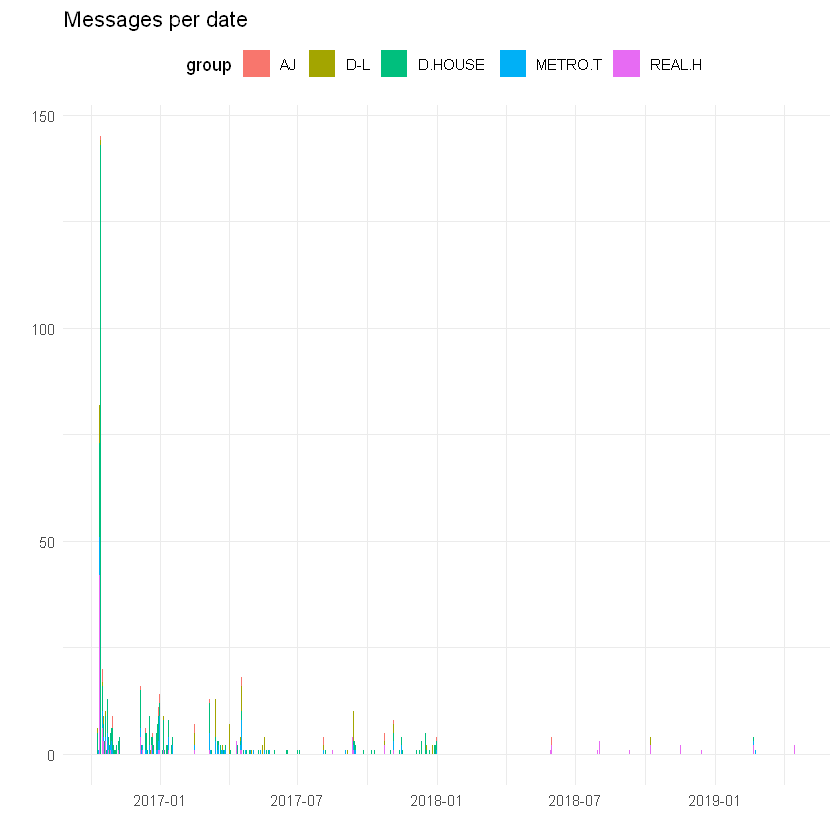

In [8]:
#MESSAGES PER DATE
chat %>%
  #filter(date(time) > "2016-11-01") %>%
  mutate(day = date(time)) %>%
  count(day, group) %>%
  ggplot(aes(x = day, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  #scale_fill_manual(values=colors5) +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per date") 
#table(date(chat$time)) #Optional if you want to directly read the number of messages per date, not advised with too many dates
mean(table(date(chat$time))) #Average messages per day

In this example we have a nearly 2 and half year history of conversations that were very frequent at the beginning and scarce at the end. In average, 5.14 messages were published per day. I think this is a common behavior in many chat groups that we often don't notice due to the large volume of conversations. At the beginning of a group we experience many interactions and then, progressively, the activity slows downs and sometimes reaches to a halt. 

When we observe the number of conversations on a daily basis there is the risk of having isolated spikes (very narrow bars) that make it hard to distinguish the filling attributes. This is particularly true when dealing with a large range of dates. We can apply filters to constrain the date ranges and have a closer look of limited dates with better bar displays. Also, we can group the input data into other time attributes, which is what we are going to do in the following steps.

## Messages per year

Now we are going to group the number of conversations per year, with the lubridate function year applied to our time variable, `year(time)`. Here we will be able to get yearly insights and how small or big were the interactions of each group or each author. In this example I'm using the "group" attribute but you can change it to another of your choice. Here I am more confident to use the `table` function because there are few years.

As color scale, we will be using the manual scale that I previously defined at the beginning of the plotting section, that I called **colors5**. But you are free to define and select the color scale that you consider more appropriate. The web has a large quantity of literature developing color scaling that helped me choose my colors. This DataNovia website lists the [Top R Color Palettes](https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/). But if you search on the internet you will find more articles and descriptions about the color scales in R.


2016 2017 2018 2019 
 421  234   17    7 

[1] 169.75

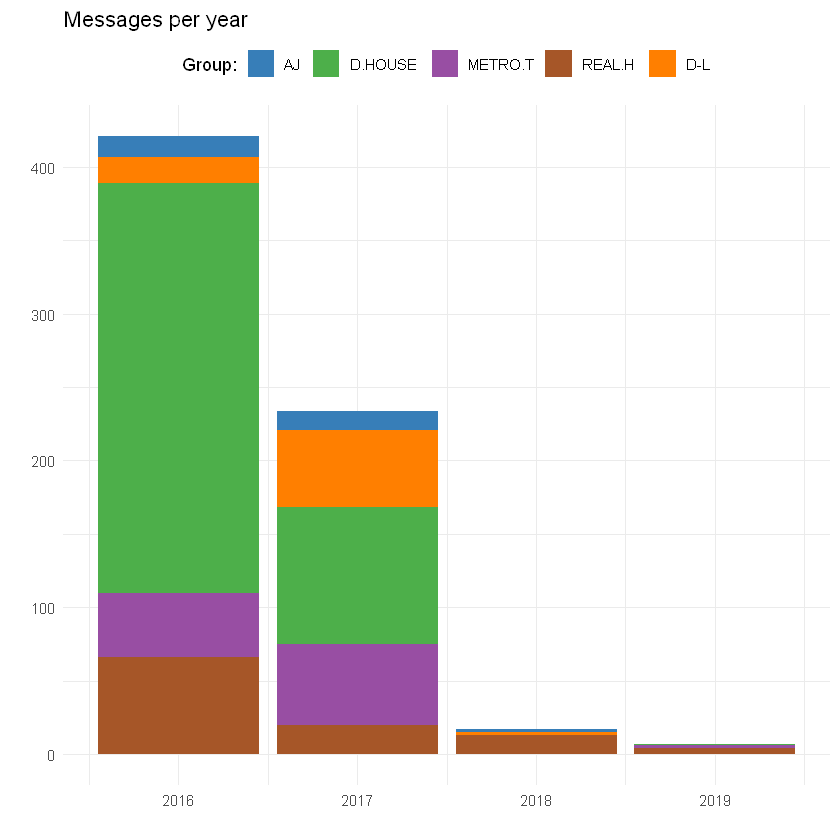

In [9]:
#MESSAGES PER YEAR
chat %>%
  mutate(year = year(time)) %>%
  count(year, group) %>%
  ggplot(aes(x = year, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5, name = "Group:") +
  #scale_fill_brewer(palette = "Set3",name = "Group:") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per year") 
table(year(chat$time))
mean(table(year(chat$time)))

It is clearer now to understand how big were the interactions when the chat was created in (late) 2016, with 421 messages that year and how the activity drastically dropped after 2017, to only 9 messages in 2019. The people of the Dream House group was very active in the first two years, but in the last two years their activity nearly dropped to nothing. The people from Diaz Lopez increased their participation in 2017 and reduced them later. Real House and Metro Techo kept their participations along the years.

## Messages per month

Now we observe the behavior of the chat per month, `month(time)`. In this example I change the attribute to author and the color scale to a Brewer set3 palette. I also change the legend position to the right. These changes have the purpose to diversify the analysis points of view.

Since the months are discrete values, it is important to transform them as "factors". It is also recommended to relabel the months because the default monthly nomenclature is numeric.

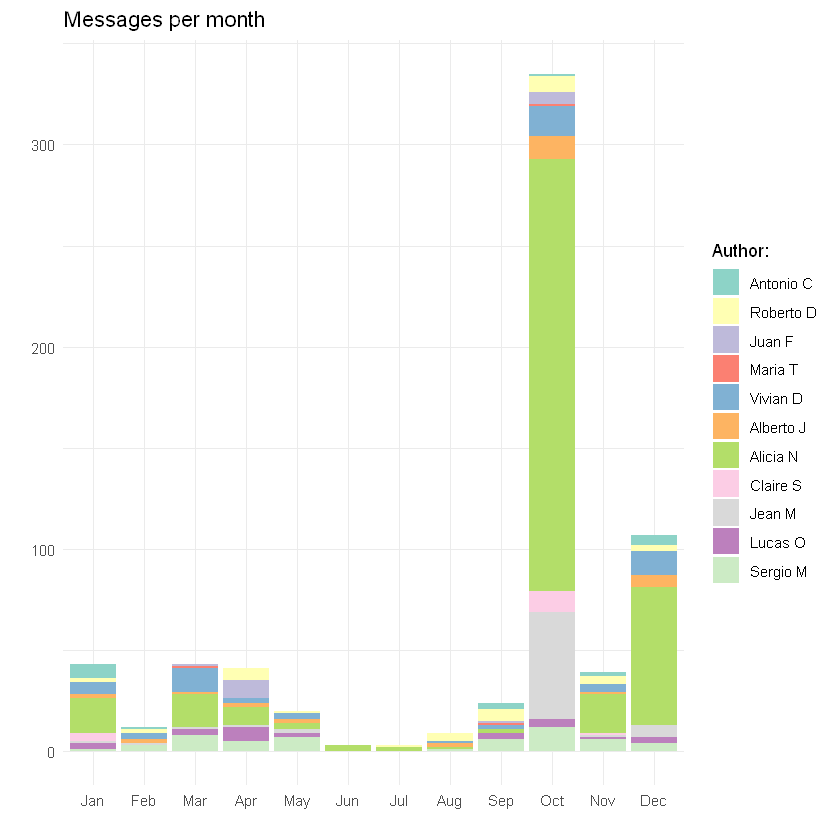

In [10]:
chat %>%
  mutate(Month = factor(month(time),ordered = TRUE)) %>%
  count(Month, author) %>%
  ggplot(aes(x = Month, y = n, fill=author)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set3",name = "Author:") +
  #scale_fill_manual(values=colors5) +
  scale_x_discrete(labels=c("1"="Jan","2"="Feb","3"="Mar","4"="Apr","5"="May","6"="Jun",
                            "7"="Jul","8"="Aug","9"="Sep","10"="Oct","11"="Nov","12"="Dec")) +
  theme(legend.position = "right") +
  ylab("") + xlab("") + ggtitle("Messages per month") 

We can see that Alicia, from Dream House, was the person who more interacted along the year, but her interaction peak occurred in October, 2016 as we can deduct from the previous plots. Despite that the number participants are not too big, it sometimes gets hard distinguish them, especially when the bar bands, corresponding to each author, are too narrow. The problem would get worse if there were more participants because the plot will saturate a lot. For that reason, I prefer to use another grouping category more visually friendly, such as group in our example.

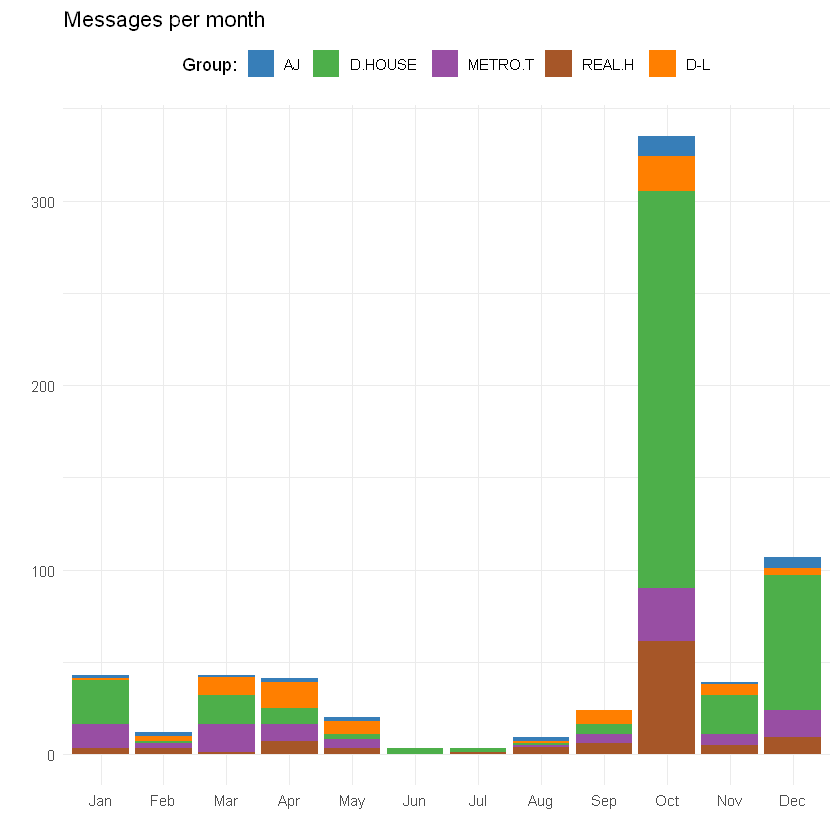

In [11]:
chat %>%
  mutate(Month = factor(month(time),ordered = TRUE)) %>%
  count(Month, group) %>%
  ggplot(aes(x = Month, y = n, fill=group)) +
  geom_bar(stat = "identity") +
  #scale_fill_brewer(palette = "Set3",name = "Group:") +
  scale_fill_manual(values=colors5, name = "Group:") +
  scale_x_discrete(labels=c("1"="Jan","2"="Feb","3"="Mar","4"="Apr","5"="May","6"="Jun",
                            "7"="Jul","8"="Aug","9"="Sep","10"="Oct","11"="Nov","12"="Dec")) +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per month") 

In this case, it is visually better to observe each group behavior per month. The low traffic months of June and July were fed by the Dream House and Real House members.

### Messages per hour

Another interesting exercise could include counting messages per hour of the day. We take as base the codes we used to plot the daily messages and change the x input to hours with the function `hour(time)`. It is important to remark that the imported time corresponds to the time zone set in your exporting device. If you are going to share your plots with members located in different time zones, it is a good practice to tag in your graphics that the hours correspond to your time zone. For example, I generated this plots from the time zone UTC -05, the one used by US Central Time zone in winter, west South America and eastern Central American countries. If someone in Europe, in a time zone UTC +00 or more, reads the plots, he or she may have a better reference with the right time zone description.


  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  9   4   3   1   2   9  17  35  26  37  62 104  83  45  36  54  20  19  25  21 
 21  22  23 
 46  16   5 

[1] 29.52174

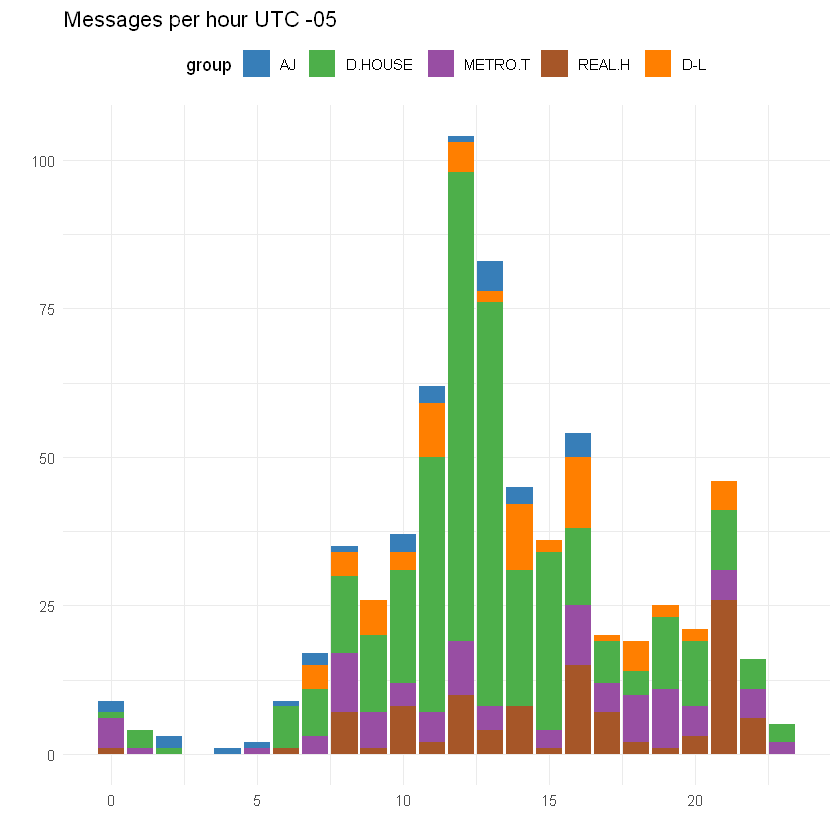

In [12]:
#MESSAGES PER HOUR
chat %>%
  mutate(Hour = hour(time)) %>%
  count(Hour, group) %>%
  ggplot(aes(x = Hour, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5) +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per hour UTC -05")
table(hour(chat$time)) #Optional if you want to directly read the number of messages per hour
mean(table(hour(chat$time))) #Average messages per hour

Here we see that most of the messages were posted around noon, when the Dream House team activity was more intense. It is curious that some messages were posted very late at night or too early in the morning.

### Messages per day of the week

Now we are going to visualize the magnitude of the message posting per day of the week. We change the time function to `weekdays(time)` to extract the day of the week information and count the quantity of messages per weekday. In this approach, it becomes necessary to first order chronologically the days of the week. We do this by specifying the need of ordering, `ordered=TRUE`. It is also a good idea to label the days of the week with words, because they are numeric by default, by defining the following vector: `levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")`. 

As color scale, we will be using the manual scale **colors5**.

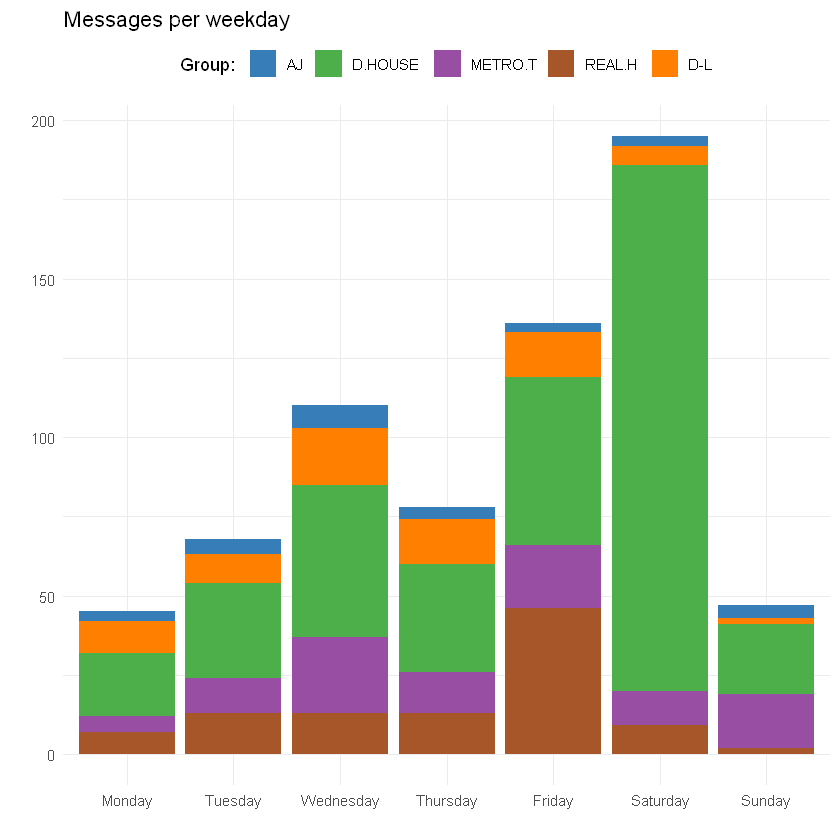

In [13]:
#MESSAGES PER WEEKDAY
chat %>%
  mutate(wkd = factor(weekdays(time),ordered = TRUE,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))) %>%
  count(wkd, group) %>%
  ggplot(aes(x = wkd, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5, name = "Group: ") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per weekday")

It is remarkable how big was the participation on Saturdays. However, given that we saw very large interactions at the beginning of the chat in October 2016, we now repeat the weekdays plot but excluding 2016.

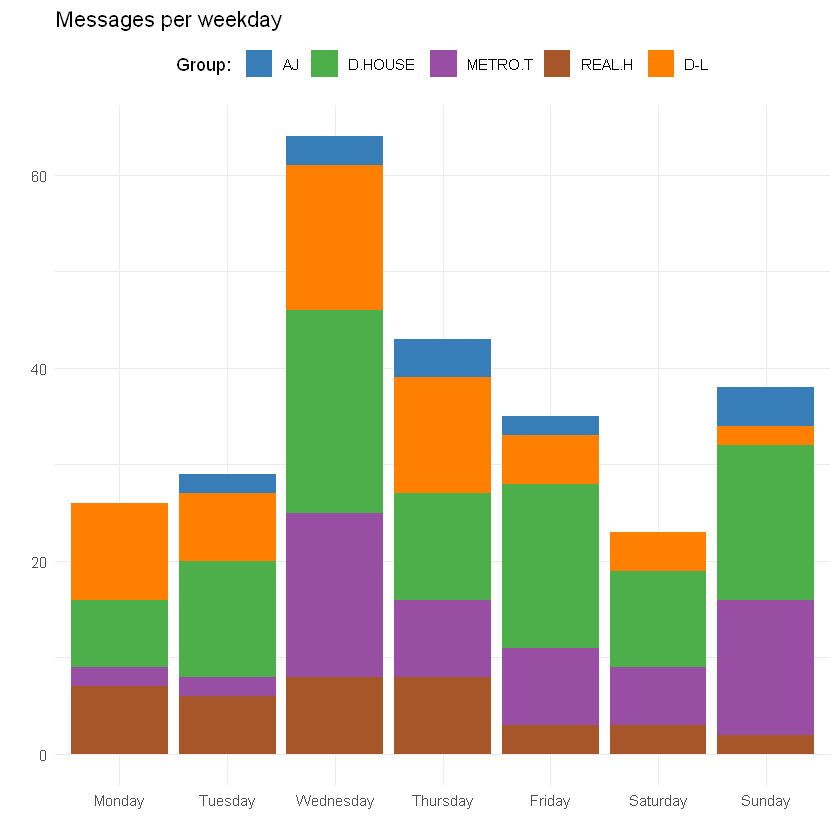

In [14]:
#FILTERED MESSAGES PER WEEKDAY
chat %>%
  filter(year(time) > 2016) %>%
  mutate(wkd = factor(weekdays(time),ordered = TRUE,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))) %>%
  count(wkd, group) %>%
  ggplot(aes(x = wkd, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5, name = "Group: ") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per weekday")

Now we see that in a more regular basis the interactions were greater on Wednesdays and Thursdays, with more balanced participations per group.

Another visualization of the messages per hour could consider another filling attribute such as the day of the week (`weekday(time)`). This way, we would observe what weekdays contribute more to specific hours of the day. In this example we can observe that the more intense activity happened between 11am and 1pm (13h), mainly due to the postings on Saturday. Friday night also created a local peak.

Also notice that I used the predetermined **Brewer Set1** color scale, that has 7 discrete colors, the same number of the weekdays.

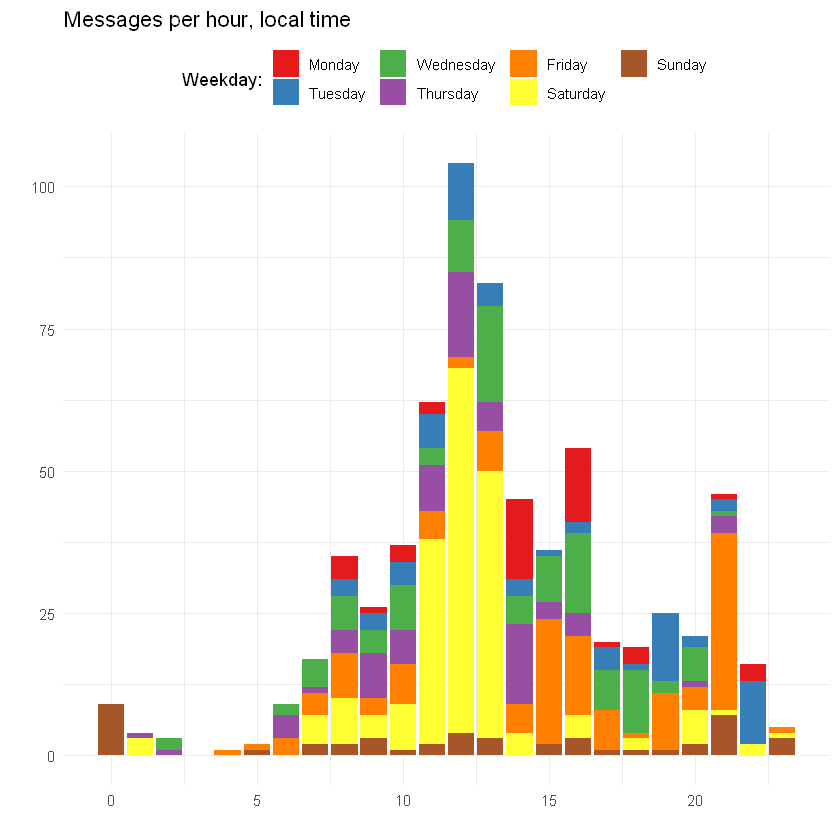

In [15]:
#MESSAGES PER HOUR AND WEEKDAY COUNT
chat %>%
  mutate(Hour = hour(time)) %>%
  mutate(wkd = factor(weekdays(time),ordered = TRUE,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))) %>%
  count(Hour, wkd) %>%
  ggplot(aes(x = Hour, y = n, fill = wkd)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set1",name = "Weekday:") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per hour, local time")

From this plot we deduct that the peak activity at noon was mainly fed by the interactions on Saturdays. The local peak at 9pm (21h) was mainly due to Friday interactions. Midnight Sundays were slightly active too.

### Messages per feature: Group

We have already obtained some insights about the message posting of the imported chat from the time perspective: dates, weekdays and hours. But we can focus on other attributes. For example, we could focus on the group contributions to the chat group and complement the graphics with a time attribute such as year. This way, we were able to observe what groups post more and in what days the posted more.

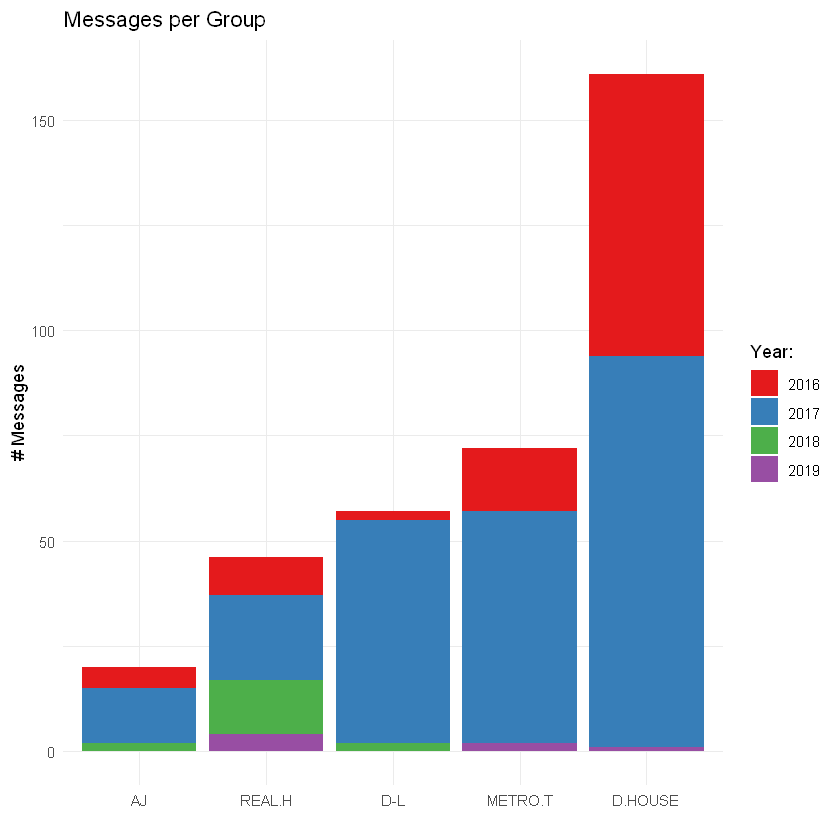

In [16]:
#MESSAGES PER FEATURE
chat %>%
  filter(date(time) > "2016-10-31") %>%
  mutate(yr = factor(year(time), ordered = TRUE)) %>%
  count(group, yr) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(group, n), y = n, fill=yr)) +
  geom_bar(stat = 'identity') +
  scale_fill_brewer(palette = "Set1",name = "Year:") +
  theme(legend.position = "right") +
  ylab("# Messages") + xlab("") +
  ggtitle("Messages per Group")

From the previous plot we clearly see that the users from the Dream House team significantly posted more than the users from the other teams. Their activity was very intense in the years 2016 and 2017. Despite their relatively low contributions, Real House team members posted more than the rest in 2018. AJ team was the less participative of the groups.

### Messages per feature: User

It is time to analyze another feature: The user's contributions. This time we flip the plot `coord_flip()` in order that the x axis, the "author" variable, becomes vertical. Also we specify a descending order. As result our plot will show on top the users that contribute more and as we descend, it progressively shows the users that contribute less.

If the amount of users is large, it is recommended to filter the quantity of users to plot. A good number could be 10, which in turn means that we would be generating a "Top 10" list of the users that posted more messages in the chat group. The command `slice_max(n, n = )` allows us to show the n number of users that had a greater attribute count.

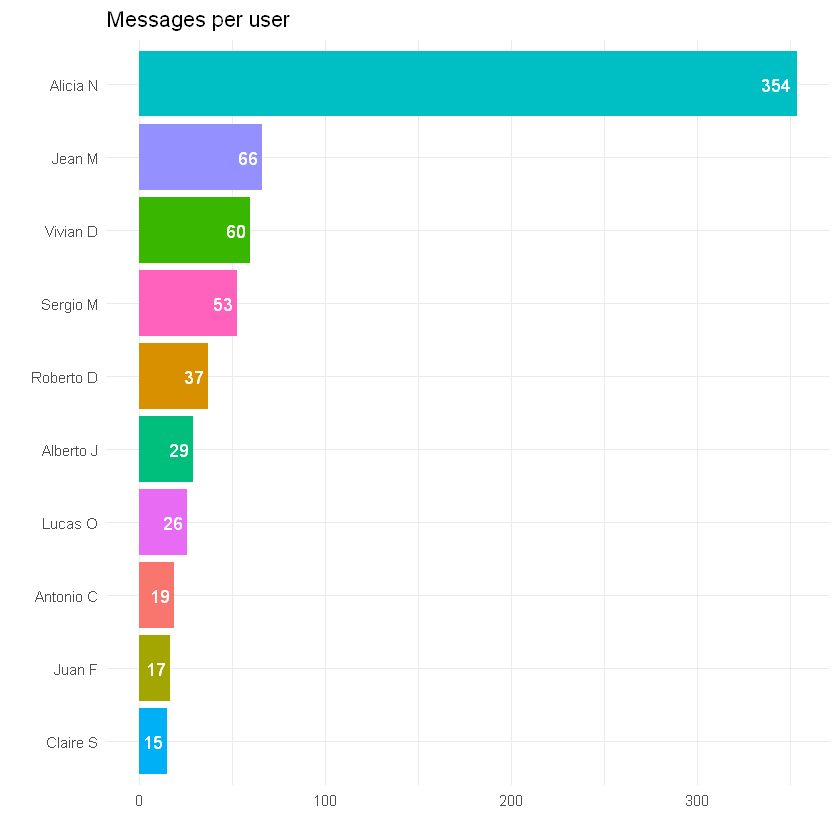

In [17]:
#MESSAGES PER USER
chat %>%
  count(author) %>%
  slice_max(n, n = 10) %>% #Filter the n authors with more contributions
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(author, n), y = n, fill = author)) +
  geom_bar(stat = "identity") +
  #scale_fill_manual(values=colors5) +
  geom_text(aes(label = n), hjust = 1.2, color = 'white') +
  theme(legend.position = "") +
  ylab("") + xlab("") +
  coord_flip() + ggtitle("Messages per user")

From this plot we clearly observe that Alicia was by far the person who contributed the most to the chat.

## TEXT ANALYSIS

Until now we have performed some visual analysis based on the quantity of messages. Now we want to deepen into the text content. Not necessarily the people who post more messages write (or paste!) more words. Diversity of words could also be another source of insights. Thereby, our most important input in this section is the text content of every message. Fortunately, **rwhatsapp** allows us to obtain a column dedicated to the text content for each row or message. 

However, emoji, come included in the text data. They may add noise (unnecessary data) to the text content or cause some problems to our codes. We might want to remove them first by converting the text attribute from UTF-8 to ASCCI format with `iconv`function.

Also, as it is expected, most of our conversations are full of connecting words such as articles, prepositions and conjunctions that help us write correctly, but don't help to a statistical analysis because those words alone don't give insights about the conversations and they get repeated a lot. In this type of analysis, we prefer to stay with nouns and adjectives that are more representative of the chat topics. The library **stopwords** has lists of different connecting and very common words in different languages that will help us automatically identify and filter them. If your language is English, the stopwords function to use would be `stopwords("en")`. If it is Spanish, it is `stopwords("es")`. You can check the language of your choice. There could be many more words that you may consider irrelevant for your text chat analysis. I'll leave my exclusion list in Spanish as example.

So, our initial steps will be to extract the text information of our chat, exclude emoji (more important if you are working under R version 3) and define our exclusion list (stopwords, very common words and so on). Some words I recommend you to exclude are the words "multimedia" and "omitted" or their equivalent in the language of your WhatsApp application because these are the words that WhatsApp exports to the text file where a multimedia file was shared (video, audio, gif or sticker).

In [18]:
#Extract text attribute
text = chat$text

#Remove emojis
text = iconv(text, 'UTF-8', 'ASCII')

#List of words to remove (try and refine the list if you consider more or less words should be included!)
exclude = c(stopwords("es"),"multimedia","omitido",
              "buenas","saludos","gracias","jajajaja","jajaja","jejeje",
              "voy","nunca","días","asi","acá","hola","aquí","dice","tarde", "tardes",
              "así","mas","solo","creo","día","mejor", "siempre","ser","si",
              "bien","bueno","buena","buenos","buen","hace","hahahaha","iba",
              "ahora","mismo", "tan","ahí","vez","ver","mal","horas","cada")

### Word count

We can visualize how many words each participant contributed to the chat. At the beginning, you might think that the more messages you post, the more words you'll feed the chat. But that is not necessarily true. With the following word count you will see vertically and in descending order the users that shared more words with their corresponding quantities. Since we are not interested in considering the words included in the exclusion list (yes, I know it sounds odd!), we filter the words that are not part of that list.

The following code cell is basically the same that J. B. Gruber and also very similar to one published at the Text Mining with R work. We apply the **tidytext** function `unnest_tokens` to extract the words to count and `length()` to count them. We plot this word counting with **ggplot**. The exclusion of words is applied with the `filter` function. If there are too many participants, we can limit them to the top contributors with `slice_max`.

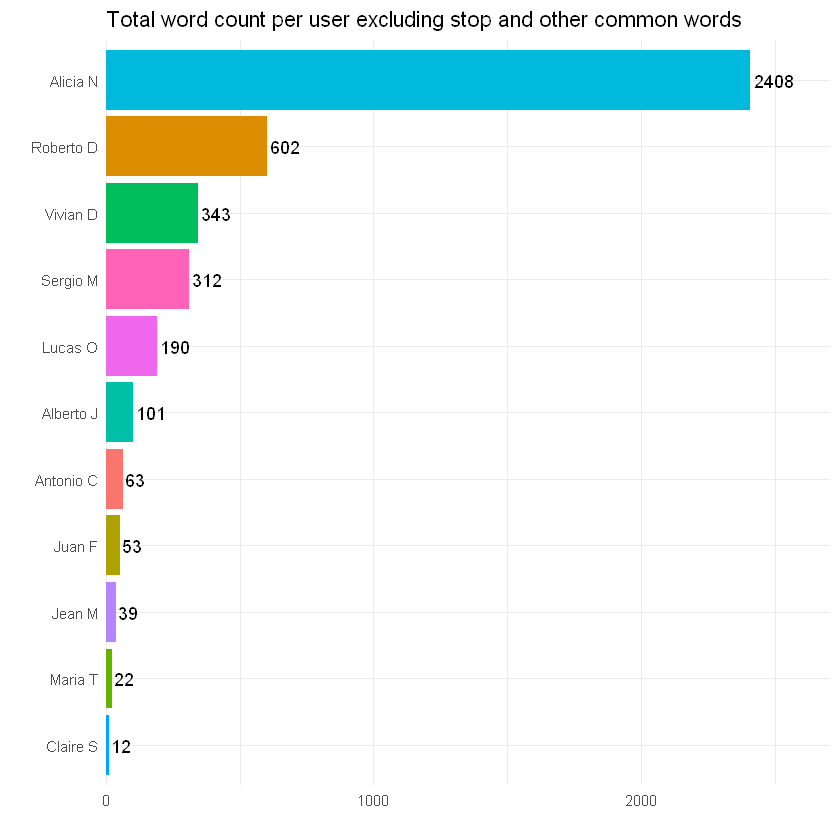

In [19]:
#TOTAL WORD COUNT PER USER
chat %>%
  unnest_tokens(input = text,
                output = word) %>%
  filter(!word %in% exclude) %>%
  group_by(author) %>%
  summarise(sumwords = length(word)) %>%
  slice_max(sumwords, n = 20) %>%
  arrange(desc(sumwords)) %>%
  ggplot(aes(x = reorder(author, sumwords),
             y = sumwords,
             fill = author)) +
  geom_col(show.legend = FALSE) +
  scale_y_continuous(expand = (mult = c(0, 0, 0, 300))) +
  geom_text(aes(label = sumwords), hjust = -0.1) +
  ylab("") +
  xlab("") +
  ggtitle("Total word count per user excluding stop and other common words") +
  coord_flip()

Another interesting exercise to do very similar to the previous one is to count how many distinct words were published by each user. It sometimes happens that the person who wrote more words did not use the most diverse glossary. This time, instead of using `length()` to count words, we use `n_distinct()` to count how many different words are included in our input data.

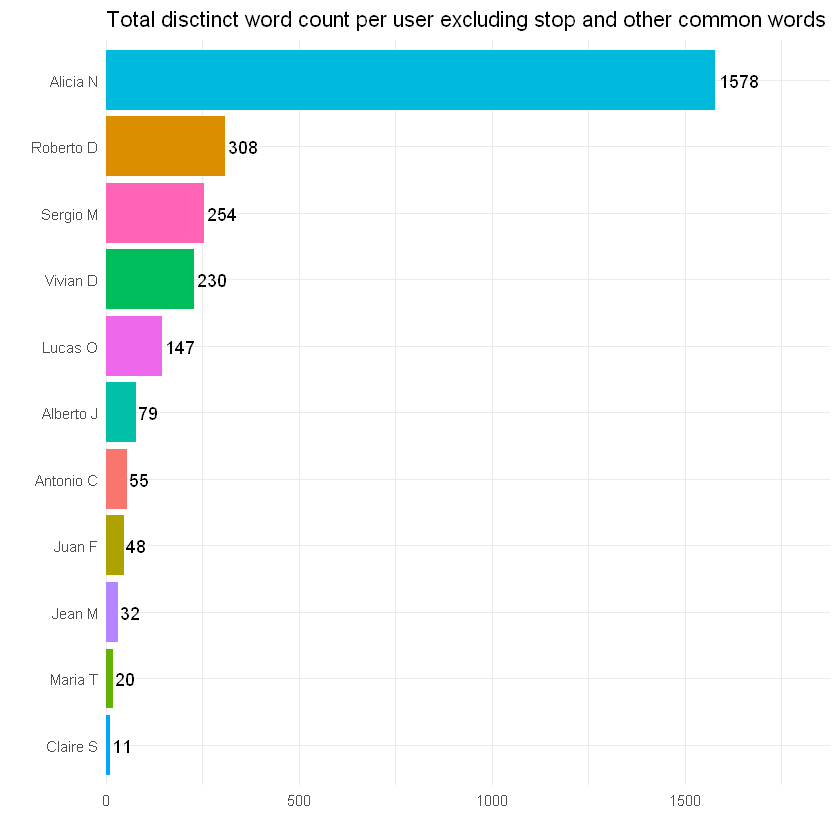

In [20]:
#DIFFERENT WORD COUNT PER USER
chat %>%
  unnest_tokens(input = text,
                output = word) %>%
  filter(!word %in% exclude) %>%
  group_by(author) %>%
  summarise(lex_diversity = n_distinct(word)) %>%
  slice_max(lex_diversity, n = 20) %>%
  arrange(desc(lex_diversity)) %>%
  ggplot(aes(x = reorder(author, lex_diversity),
             y = lex_diversity,
             fill = author)) +
  geom_col(show.legend = FALSE) +
  scale_y_continuous(expand = (mult = c(0, 0, 0, 300))) +
  geom_text(aes(label = lex_diversity), hjust = -0.1) +
  ylab("") +
  xlab("") +
  ggtitle("Total disctinct word count per user excluding stop and other common words") +
  coord_flip()

### Word cloud

The following exercise consists in visualizing the most popular or used words in our chat gathered in a cloud shape. The more frequent the word is, the bigger it will be displayed in the cloud. We end up visualizing key words that let us remember the topics discussed or give us some ideas about the discussed topics or conversation natures. A word cloud is a popular and practical way to achieve this.

We use as input the extracted text attribute that was previously used as input for the word count exercise. But first we need to process it. If you don't apply the emoji removal command, your word cloud will let you display them if you are using an R version 4 or more. With R 3 it becomes necessary to remove the emoji from the text input.
 
For the processing steps we rely on **tm** functions. First, we convert the text rows (messages) into a "corpus" text collection with `VCorpus(VectorSource())`. Then we proceed to convert all the word letters to lower case with `tolower` to make sure that same words with different upper and lower case letter configurations are not considered as different words. It is also important to remove punctuation marks with `removePunctuation` because they are not needed in our cloud visualizations. With `removeWords` we get rid of those words that we don't consider meaningful alone. Since we previously defined an exclusion list that contained stopwords and other common words, we call it in the `removeWords` command. Also, we are not interested, or may not be, in including numbers in our clouds. Therefore, we remove them with `removeNumbers`.

Our next steps will transform our preprocessed text document or corpus into a matrix dataframe consisting of a list of words and their repetition frequency.

Depending on the volume of your chat, this step might take some time or get too long because the generated matrix normally gets considerably bigger than the original database. Depending on each case, it may be necessary to subset the original data to a limited range of days or dates prior to extracting the text input and proceeding to the processing steps.

In [21]:
corpus = VCorpus(VectorSource(text))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, exclude)
corpus = tm_map(corpus, removeNumbers)
Matrix = as.matrix(TermDocumentMatrix(corpus))
words = sort(rowSums(Matrix), decreasing = TRUE)
matrixdf = data.frame(word = names(words), freq=words)

Now let's finally build and visualize our word cloud. I share two ways of doing it. Firstly, with the classic `wordcloud` option and lastly with the more fashionable `wordcloud2` plot.

The `wordcloud` cloud requires some input parameters. With `min.freq` we establish a minimum of repetitions from where the words will be plotted. You can start by applying a minimum frequency of 10 and adjust this quantity based on what you see plotted. If you increase this parameter, your cloud will become more scarce in words. But if you decrease it, the cloud will become more populated and at some point it may get saturated. `max.word` establish a maximum quantity of words to include in our cloud. More than 150 words will be hard to catch. `scale` is a two-dimension parameter that regulates the proportional size of your words. Normally I like to start adjusting from (1.5, 0.5) dimensions. `rot.per` has a value range from 0 to 1 and establishes the proportion of words that can be rotated. `random.order` if not set, it is FALSE by default and it means that every time you run the wordcloud command the more frequent words, visually bigger, will try to be more concentrated in the center of the cloud ad the smaller less frequent words will go to the borders. If you set this parameter to TRUE, the words will be randomly displayed no matter how big (frequent) they are. `colors` let us define the color scale we want to define for our words. You can leave this parameter undefined (not written) and rely on the default scale or use a previously existent color scale or use a customized one. In this example I use the Brewer palette "Blues" with nine colors, but constraining it to the last 5 colors because the firsts ones are very clear and hard to distinguish.

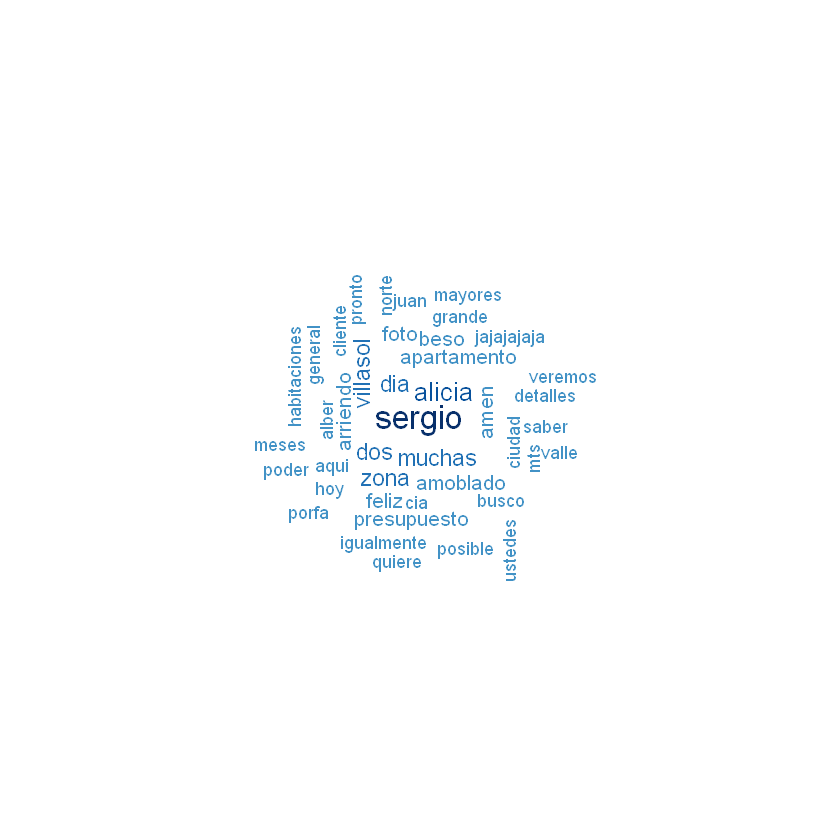

In [22]:
#Word cloud
set1rev = c("#F781BF","#A65628","#FF7F00","#984EA3","#4DAF4A","#377EB8","#E41A1C")
wordcloud(words = matrixdf$word, freq = matrixdf$freq, min.freq = 2,
          max.word = 200, scale = c(1.65, 0.65),rot.per = 0.15, 
          random.order = FALSE, colors = brewer.pal(9, "Blues")[5:9])

The other word cloud option I considered was `wordcloud2`. It is relatively simpler to manipulate and provides more artistic and contrasting clouds. You simply call the input matrix and it will automatically recognize the word data and the corresponding frequency attribute. If you want to constrain for example a minimum for the frequencies, you filter as you would normally do in R, between brackets [] defining a greater than ">" condition for the frequency attribute. `size` determines the size of the words. `gridsize` basically regulates the distance between words. A popular `color` scale is 'random-dark', but there are many other color scales that you could use. `backgroundColor` is white by default, but you can change it to another color. `ellipticity` set to one is circular, but I prefer to decrease this number between 0 and 1 to increase ellipticity or flatness. `shuffle` set to TRUE will change the word positions everytime we execute the *wordcloud2* command.

There are more parameters that you can check on [Cran-R](https://cran.r-project.org/web/packages/wordcloud2/vignettes/wordcloud.html) and [RDocumentation](https://www.rdocumentation.org/packages/wordcloud2/versions/0.2.1/topics/wordcloud2) sites.

In [23]:
#Word cloud 2
wordcloud2(matrixdf[matrixdf$freq > 1,], size=0.3, gridSize = 1, color='random-dark',
           backgroundColor = "white", ellipticity = 0.8, shuffle = TRUE)

HTML widgets cannot be represented in plain text (need html)

### Word frequency distribution per user

As we explained before, from the word cloud we can distinguish the most frequent words in a chat. But we can inquire further into a particular word frequency distribution along the users. We modify and adapt the word count commands for this purpose. In this case we filter the text database to only include the word we want to investigate. To avoid omissions related to upper and lower case conflicts, I recommend to convert to lower case letters with `tolower()`. 

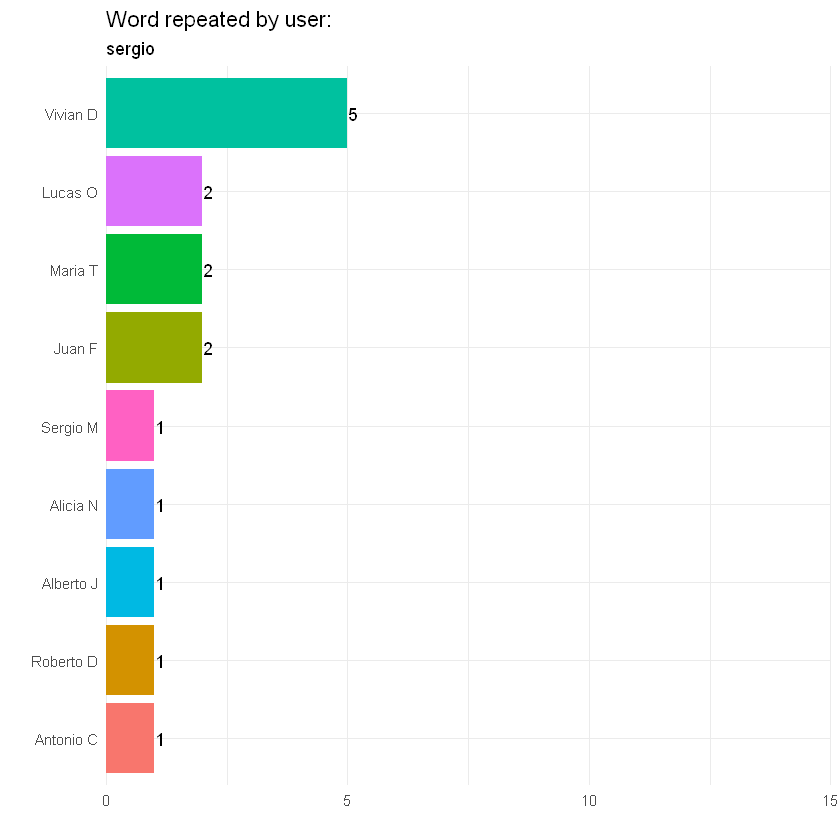

In [24]:
#Word repeated by users
Word = 'sergio'
chat %>%
  unnest_tokens(input = text, 
                output = word) %>%
  filter(tolower(word) %in% tolower(Word)) %>%
  group_by(author) %>%
  summarise(sumwords = length(word)) %>%
  #slice_max(sumwords, n = 3) %>%  #uncomment if you want to constrain the nomber of listed users
  arrange(desc(sumwords)) %>%
  ggplot(aes(x = reorder(author, sumwords),
             y = sumwords,
             fill = author)) +
  geom_col(show.legend = FALSE) +
  scale_y_continuous(expand = (mult = c(0, 0, 0, 10))) +
  geom_text(aes(label = sumwords), hjust = -0.1) +
  ylab("") +
  xlab("") +
  ggtitle("Word repeated by user:",Word) +
  coord_flip()

## SUBSET ANALYSIS

The previous analysis was performed on the imported dataset. But we can do more detailed analysis by constraining the original dataset to a subset that takes into account a limited range of dates, weekdays, years, users or any other attribute limit that you consider relevant for your case of study.

In this exercise I will split the analysis into working days (Monday to Friday) chat and weekend chat. It is reasonable to think that during the working days we behave or interact differently from the weekend days.

In [25]:
#DATA SUBSET CONSIDERING ONLY WORKING DAYS (MONDAY TO FRIDAY)
chat_mf = chat %>%
  filter(weekdays(time) != "Saturday" & weekdays(time) != "Sunday") #Exclude Saturdays and Sundays

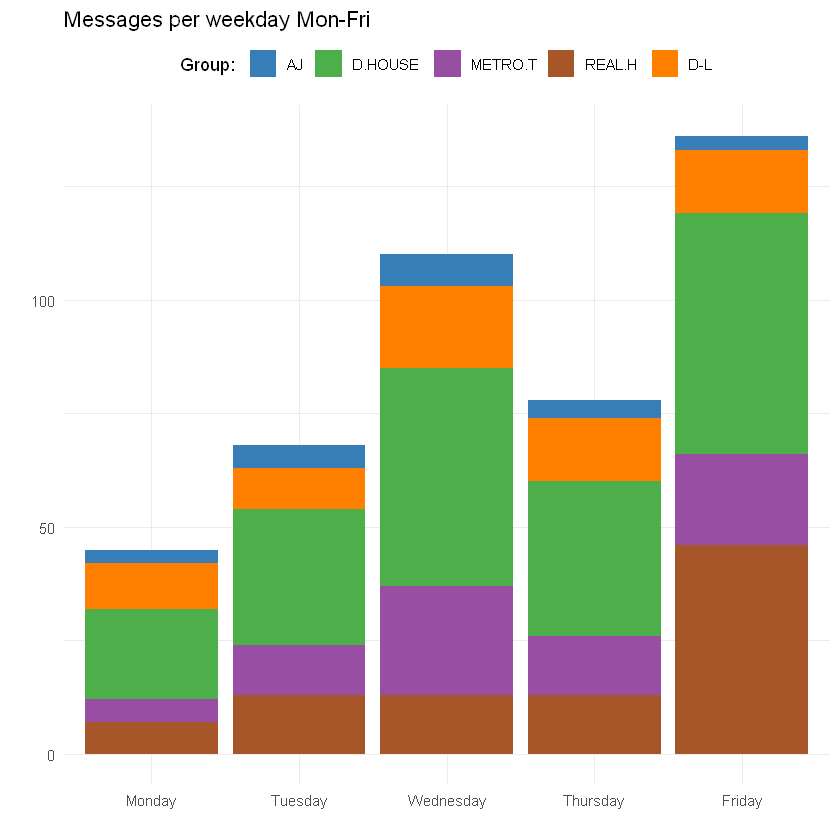

In [26]:
#FILTERED MESSAGES PER WEEKDAY WORKING DAYS
chat_mf %>%
  mutate(wkd = factor(weekdays(time),ordered = TRUE,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))) %>%
  count(wkd, group) %>%
  ggplot(aes(x = wkd, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5, name = "Group: ") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per weekday Mon-Fri")

By plotting the weekdays, we made sure that Saturdays and Sundays were excluded from our subset.

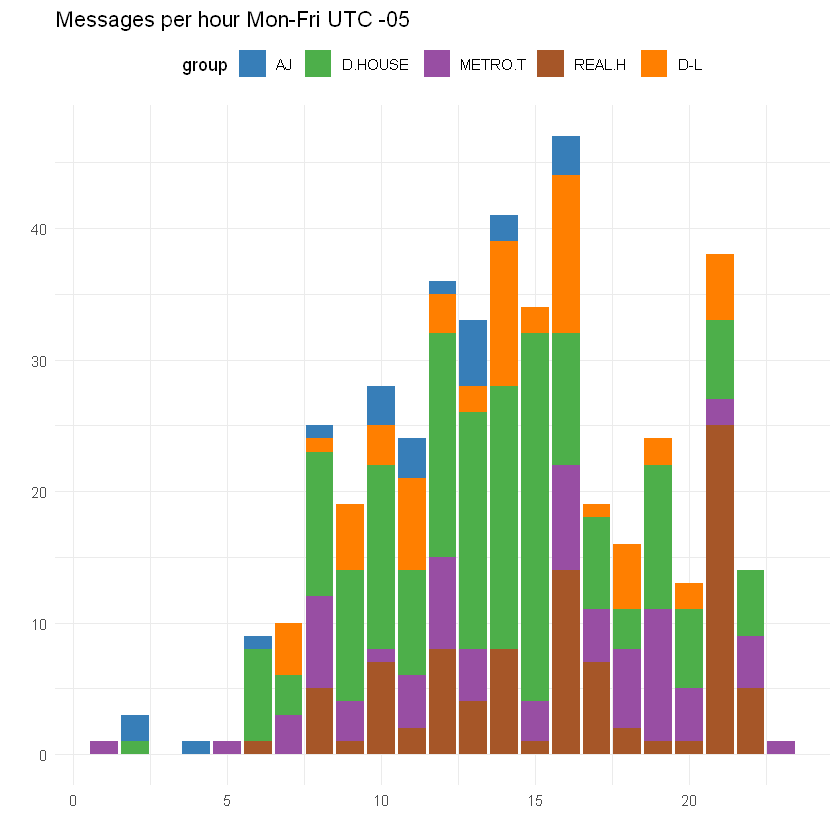

In [27]:
#MESSAGES PER HOUR WORKING DAYS
chat_mf %>%
  mutate(Hour = hour(time)) %>%
  count(Hour, group) %>%
  ggplot(aes(x = Hour, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5) +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per hour Mon-Fri UTC -05")

In the general section we observed that most of the messages were posted around noon. But when we focused our analysis to the Monday to Friday range we could realize the peak time was from 2 to 5pm, specially from 4 to 5pm. We could also notice that during the working days, in the hour with more activity, 4 to 5pm, the users from Real House posted more messages. It was odd to realize that some people from A&J, Dream House and Metrotecho posted some messages too early in the morning. 

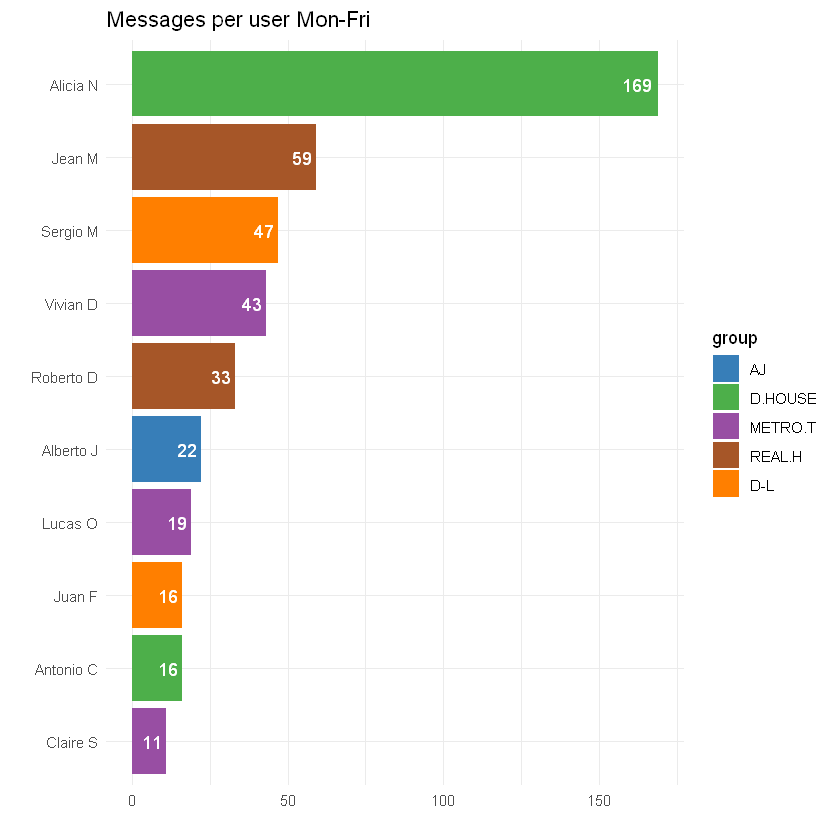

In [28]:
#MESSAGES PER USER WORKING DAYS
chat_mf %>%
  count(author, group) %>%
  slice_max(n, n = 10) %>% #constrain the listed users to top 10
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(author, n), y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5) +
  geom_text(aes(label = n), hjust = 1.2, color = 'white') +
  theme(legend.position = "right") +
  ylab("") + xlab("") +
  coord_flip() + ggtitle("Messages per user Mon-Fri")

Here we still observe that Alicia, from Dream House group, was by far the person who posted more messages during the working days.

Now let’s see how the wordcloud resulted for this subset of conversations.

In [29]:
text_mf = chat_mf$text
text_mf = iconv(text_mf, 'UTF-8', 'ASCII')

corpus_mf = VCorpus(VectorSource(text_mf))
corpus_mf = tm_map(corpus_mf, content_transformer(tolower))
corpus_mf = tm_map(corpus_mf, removePunctuation)
corpus_mf = tm_map(corpus_mf, removeWords, exclude)
corpus_mf = tm_map(corpus_mf, removeNumbers)
Matrix_mf = as.matrix(TermDocumentMatrix(corpus_mf))
words_mf = sort(rowSums(Matrix_mf), decreasing = TRUE)
matrixdf_mf = data.frame(word = names(words_mf), freq=words_mf)

In [30]:
wordcloud2(matrixdf_mf[matrixdf_mf$freq > 1,], size=0.3, gridSize = 1, color='random-dark',
           backgroundColor = "white", ellipticity = 0.8, shuffle = TRUE)

HTML widgets cannot be represented in plain text (need html)

In this cloud the typical words are more related to Real Estate topics, and Sergio seems to be a very popular and quoted person, despite he is not the one who posted more messages.

Now let's see what happened during the weekend. **Pay attention to the conditions you use to constrain**.

In [31]:
chat_ss = chat %>%
  filter(weekdays(time) == "Saturday" | weekdays(time) == "Sunday") #Only include messages posted on Saturdays OR Sundays 

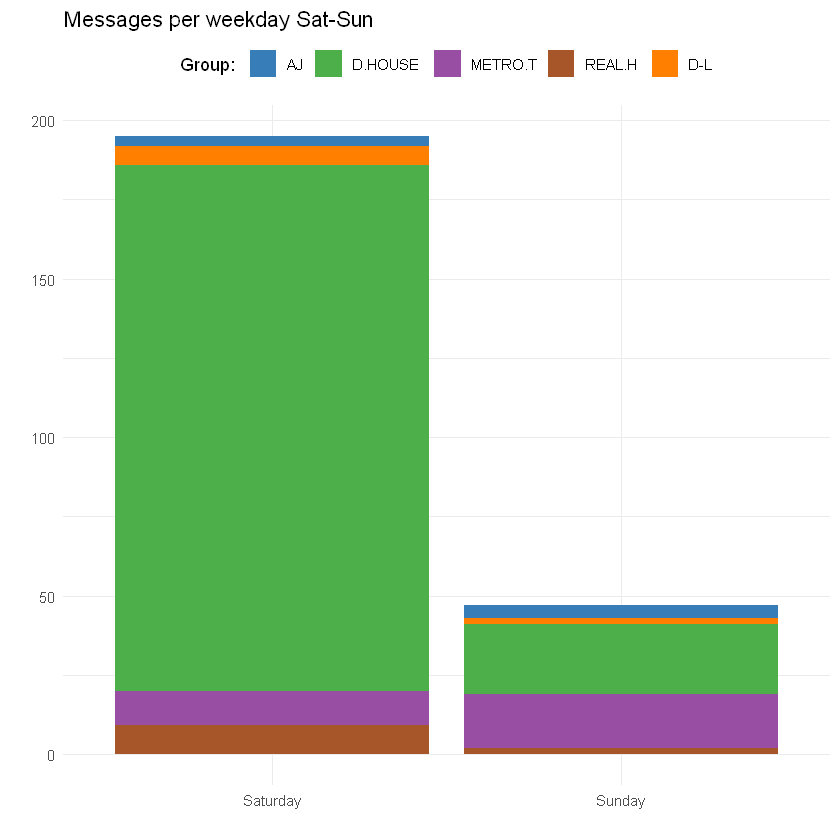

In [32]:
#FILTERED MESSAGES PER WEEKEND DAYS
chat_ss %>%
  mutate(wkd = factor(weekdays(time),ordered = TRUE,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))) %>%
  count(wkd, group) %>%
  ggplot(aes(x = wkd, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5, name = "Group: ") +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per weekday Sat-Sun")

By plotting the days of the week we verify that the subset filter for the weekend days was successfully applied. Only a small portion of messages were posted on Sundays.

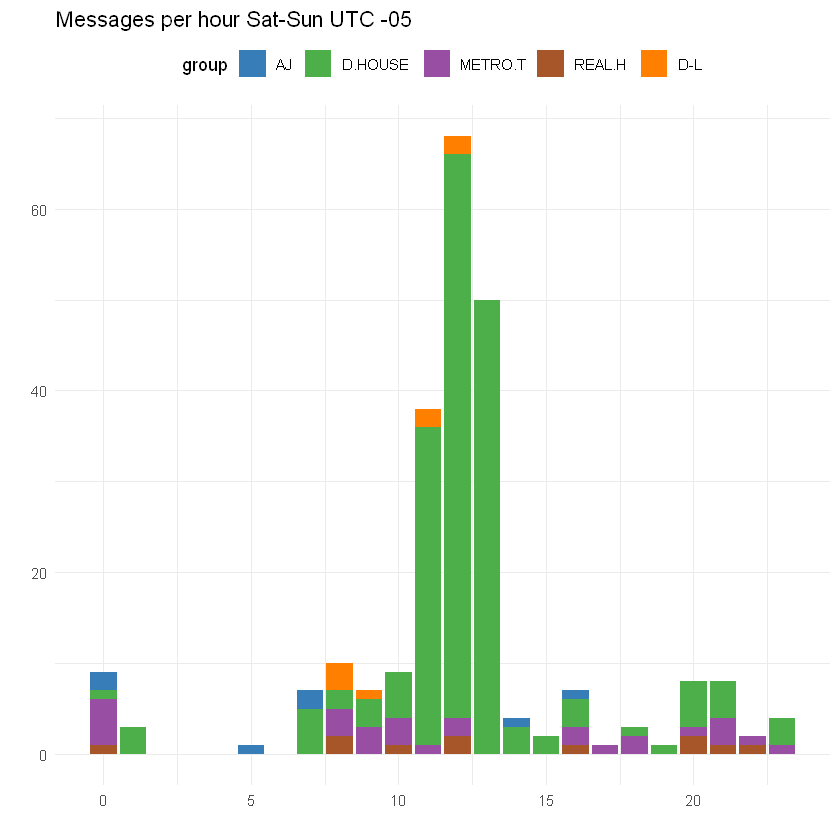

In [33]:
#MESSAGES PER HOUR WEEKEND DAYS
chat_ss %>%
  mutate(Hour = hour(time)) %>%
  count(Hour, group) %>%
  ggplot(aes(x = Hour, y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5) +
  theme(legend.position = "top") +
  ylab("") + xlab("") + ggtitle("Messages per hour Sat-Sun UTC -05")

Here we see that the peak of messages had place at noon, deeply due to the Dream House group. The nighttime was relatively quiet but there was some activity at midnight.

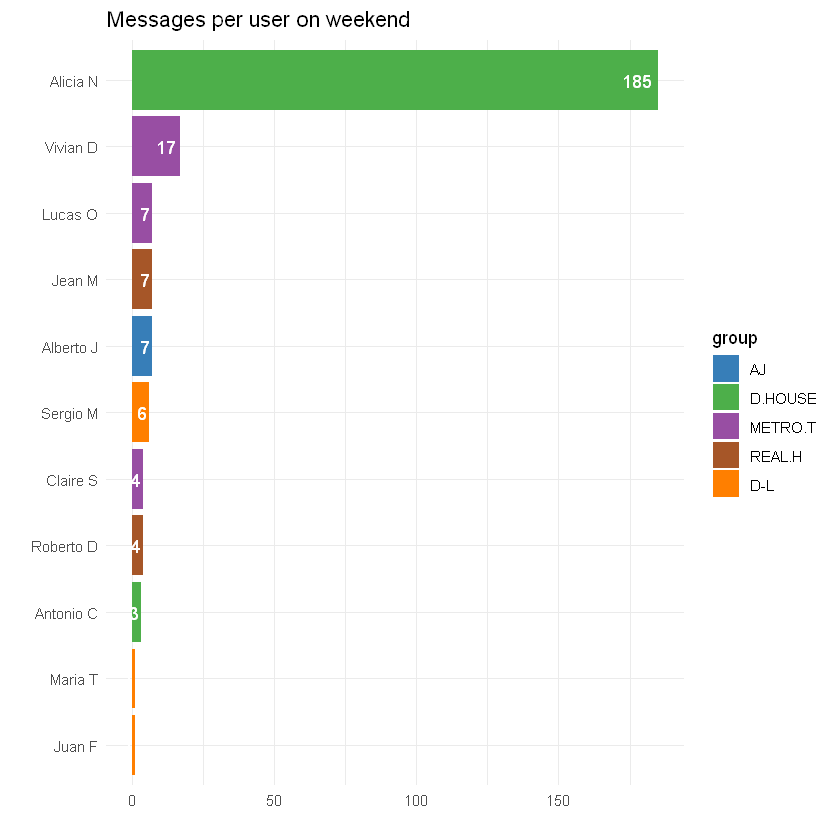

In [34]:
#MESSAGES PER USER WEEKEND
chat_ss %>%
  count(author, group) %>%
  slice_max(n, n = 10) %>% #constrain the listed users to top 10
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(author, n), y = n, fill = group)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values=colors5) +
  geom_text(aes(label = n), hjust = 1.2, color = 'white') +
  theme(legend.position = "right") +
  ylab("") + xlab("") +
  coord_flip() + ggtitle("Messages per user on weekend")

Based on these plots it is obvious that Alicia, from Dream House, was the user who wrote more during the weekends, specifically on Saturday noon.

Now it is time to see what the weekend wordcloud has to tell us.

In [35]:
text_ss = chat_ss$text
text_ss = iconv(text_mf, 'UTF-8', 'ASCII')

corpus_ss = VCorpus(VectorSource(text_ss))
corpus_ss = tm_map(corpus_ss, content_transformer(tolower))
corpus_ss = tm_map(corpus_ss, removePunctuation)
corpus_ss = tm_map(corpus_ss, removeWords, exclude)
corpus_ss = tm_map(corpus_ss, removeNumbers)
Matrix_ss = as.matrix(TermDocumentMatrix(corpus_ss))
words_ss = sort(rowSums(Matrix_ss), decreasing = TRUE)
matrixdf_ss = data.frame(word = names(words_ss), freq=words_ss)

In [36]:
wordcloud2(matrixdf_ss[matrixdf_ss$freq > 1,], size=0.3, gridSize = 1, color='random-dark',
           backgroundColor = "white", ellipticity = 0.8, shuffle = TRUE)

HTML widgets cannot be represented in plain text (need html)

In this case the topics did not vary significantly from working days to weekend.

This was just an example on how you could adapt these codes to a particular chat and how you could build a subset of the data to perform more detailed analysis.

This work had two purposes. One is to help to better understand the behavior of the users that are part of a Whatsapp chat and the other purpose is to demonstrate how some of the plot and word analysis tools can help us to mine the data and get insights from them.

Given that the conversations are private among the chat participants, I recommend to respect the privacy of the participants or reach to an agreement with them if you are going to share with others some analytic results and comments that reflect personal information and trends about them. The names, groups and places in this examples were modified to respect the privacy of the participants.

## Use and distribution of this notebook and codes:

**You are free to use and modify the codes written in this notebook**. Indeed, you will need to modify them to make them work for your particular analysis. If you want to share results and notebooks or codes based on this work, **it is important that you give credits to the authors, especially to Johannes Gruber, Julia Silge and David Robinson** who made possible the WhatsApp text analysis work that I have performed. I will appreciate it a lot if you also give me credits for my supplements to the chat analysis. You can also add value or give other perspectives to this kind of analysis. 

Once again, I want to thank my friends from school because they inspired me with challenging and active chat we have (not the demo I used here) to perform this kind of analysis that I finally shared publicly. I am also grateful with them because they constantly gave me, and still give me, feedbacks to improve or change the way I presented my results.

Any remarks or comments, you can open an issue report on my GitHub repository or contact me. I am not an expert as J. Gruber or the other quoted authors. But I consulted and adapted some solutions to this project and I am willing to help and provide feedback. However, if any issue is out of my reach, I believe it is much better to appeal to Gruber's expertise.